# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
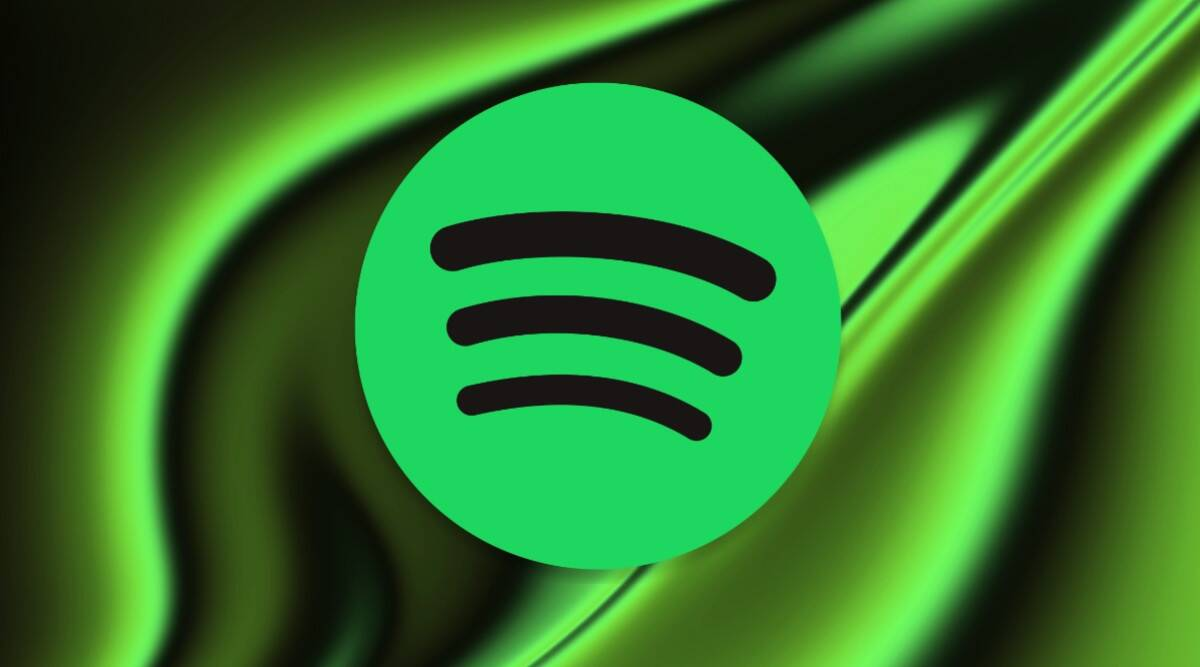
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [2]:
%pwd

'/Users/hasti/University/Term 8/Data Mining/Project/DM_Project/CODE'

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("./Dataset/Spotfiy_Persian_Artists.csv")
spotify_df.describe()

FileNotFoundError: [Errno 2] No such file or directory: './Dataset/Spotfiy_Persian_Artists.csv'

# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [ ]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [ ]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [ ]:
artist_counts = spotify_df.groupby('artist_name').size().reset_index(name='Songs Count')
artist_counts.sort_values('Songs Count', ascending=False)

,artist_name,Songs Count
46,Mohammadreza Shajarian,554
29,Hossein Alizadeh,545
56,Reza Sadeghi,507
13,Dariush,465
6,Alireza Eftekhari,439
...,...,...
52,Nasser Abdollahi,22
43,Mohammad Golriz,17
14,Ebrahim Monsefi,16
19,Farman Fathalian,10


## Q: Get the average duration of songs by each of the artists in minutes

In [ ]:
artist_avg_duration = (spotify_df.groupby('artist_name')['duration_ms'].mean() / (60 * 1000)).reset_index(name='Mean Duration')

artist_avg_duration.sort_values('Mean Duration', ascending=False)

,artist_name,Mean Duration
33,Kayhan Kalhor,7.627583
25,Hatam Asgari,7.155098
30,Iraj Bastami,7.060861
61,Shahram Nazeri,6.852404
26,Hesameddin Seraj,6.720927
...,...,...
36,Macan Band,3.222035
38,Mazyar Fallahi,3.198591
59,Sasy,3.131618
66,Soheil Nafissi,3.063580


## Q: list of artist's unique names

In [ ]:
unique_artists = list(spotify_df['artist_name'].unique())

unique_artists

['Salar Aghili',
 'Mohsen Yeganeh',
 'Mehdi Yarrahi',
 'Mohammadreza Shajarian',
 'Morteza Pashaei',
 'Hesameddin Seraj',
 'Mohammad Esfahani',
 'Mohsen Chavoshi',
 'Reza Sadeghi',
 'Abdolhosein Mokhtabad',
 'Alireza Assar',
 'Roozbeh Nematollahi',
 'Hossein Alizadeh',
 'Peyman Yazdanian',
 'Kayhan Kalhor',
 'Siavash Ghomayshi',
 'Benyamin Bahadori',
 'Alireza Eftekhari',
 'Majid Akhshabi',
 'Faramarz Aslani',
 'Iraj Bastami',
 'Ehsan Khajeh Amiri',
 'Alireza Ghorbani',
 'Parviz Meshkatian',
 'Mohammad Reza Lotfi',
 'Dang Show',
 'Nasser Abdollahi',
 'Soheil Nafissi',
 'Farhad Mehrad',
 'Afshin Moghaddam',
 'Koveyti Poor',
 'Mohammad Golriz',
 'Abbas Ghaderi',
 'Javad Yassari',
 'Sattar',
 'Mohsen Sharifian',
 'Babak Jahanbakhsh',
 'Mazyar Fallahi',
 'Mohammad Alizadeh',
 'Farzad Farzin',
 'Ali Zand Vakili',
 'Amirabbas Golab',
 'Hamid Askari',
 'Mohsen Namjoo',
 'Hamed Homayoun',
 'Kaveh Deylami',
 'Hatam Asgari',
 'Hamid Hami',
 'Shahram Shabpareh',
 'Moein',
 'Hassan Shamaizadeh',
 

## Q: Plot average duration of tracks by year

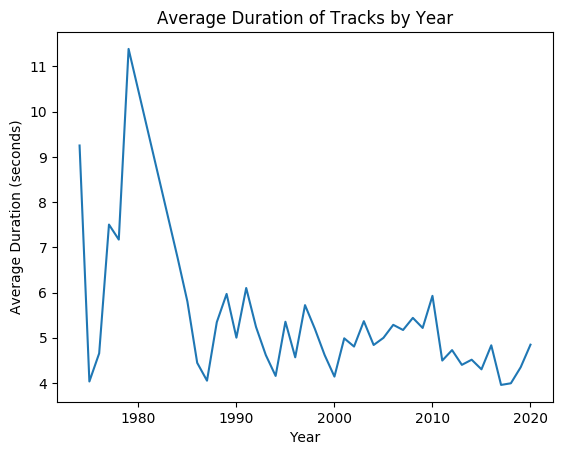

In [ ]:
filtered_df = spotify_df[spotify_df['album_release_year'] != 0]

avg_duration_by_year = filtered_df.groupby('album_release_year')['duration_ms'].mean() / (60 * 1000)

# Plotting
avg_duration_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration of Tracks by Year')
plt.show()

## Q: Plot average loudness of tracks by year

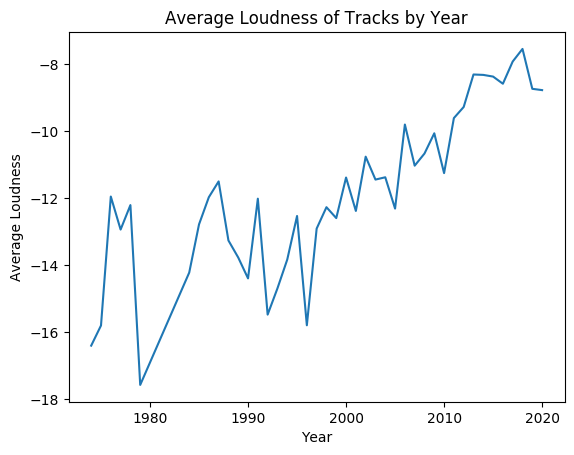

In [ ]:
filtered_data = spotify_df[spotify_df['album_release_year'] != 0]

avg_loudness_by_year = filtered_data.groupby('album_release_year')['loudness'].mean()

# Plotting
avg_loudness_by_year.plot()
plt.xlabel('Year')
plt.ylabel('Average Loudness')
plt.title('Average Loudness of Tracks by Year')
plt.show()

## Q: Music attributes of songs over the years


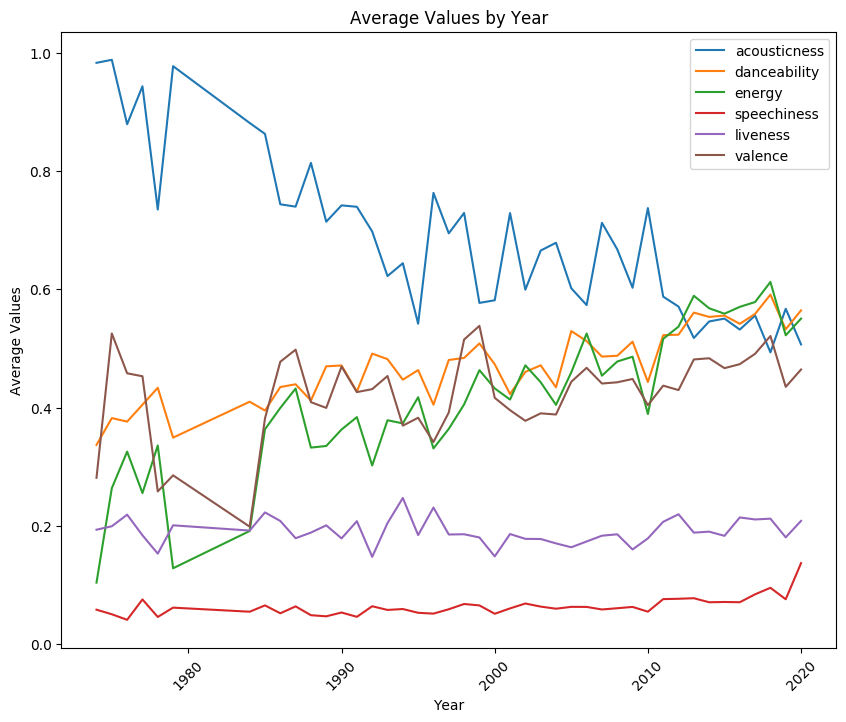

In [ ]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

filtered_df = spotify_df[spotify_df['album_release_year'] != 0]

# Calculate the average values of target columns by year
avg_values_by_year = filtered_df.groupby('album_release_year')[target_cols].mean()

# Convert DataFrame to NumPy array for indexing
avg_values_array = avg_values_by_year.to_numpy()

# Plotting
plt.figure(figsize=(10, 8))

# Plot each target column separately
for i, col in enumerate(target_cols):
    plt.plot(avg_values_by_year.index, avg_values_array[:, i], label=col)

plt.xlabel('Year')
plt.ylabel('Average Values')
plt.title('Average Values by Year')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

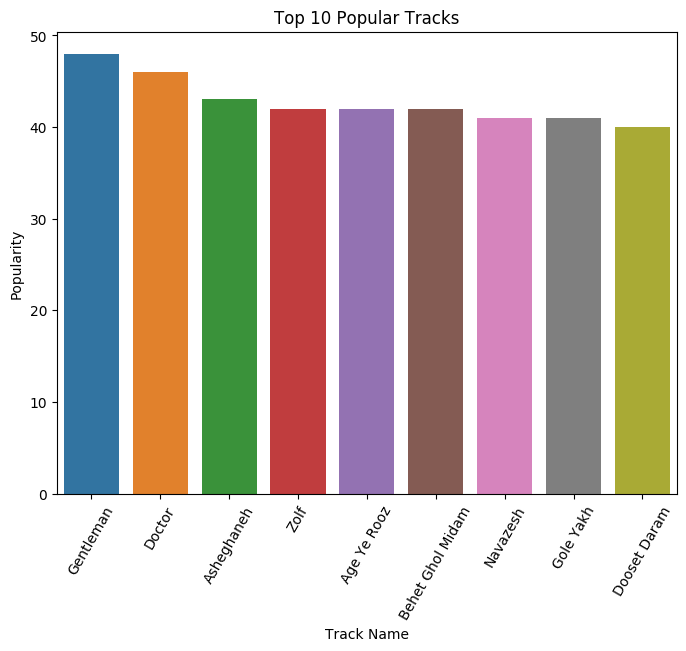

In [ ]:
popular_tracks = spotify_df.sort_values('popularity', ascending=False).head(10)

# Plot the top 10 popular tracks using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=popular_tracks, x='track_name', y='popularity')
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.xticks(rotation=60)
plt.title('Top 10 Popular Tracks')
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

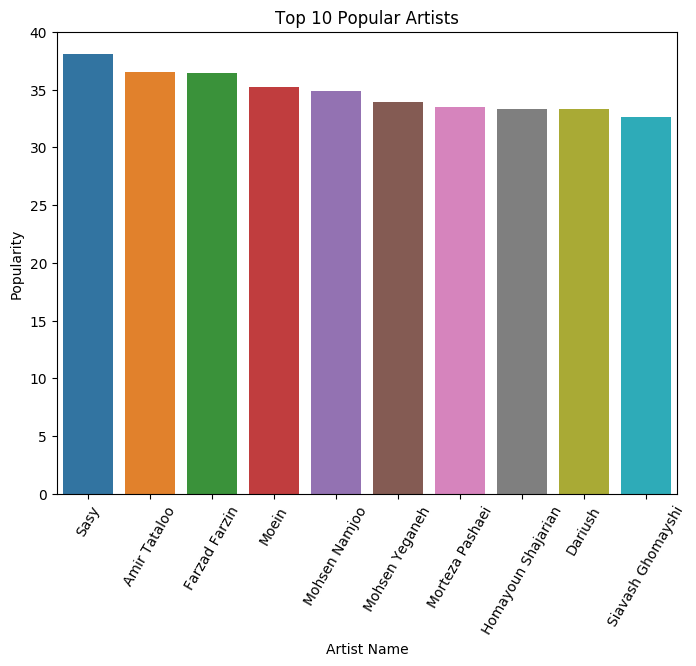

In [ ]:
popular_artist = spotify_df.groupby('artist_name')['popularity'].mean().reset_index()

popular_artist = popular_artist.sort_values('popularity', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(data=popular_artist, x='artist_name', y='popularity')
plt.xlabel('Artist Name')
plt.ylabel('Popularity')
plt.xticks(rotation=60)
plt.title('Top 10 Popular Artists')
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

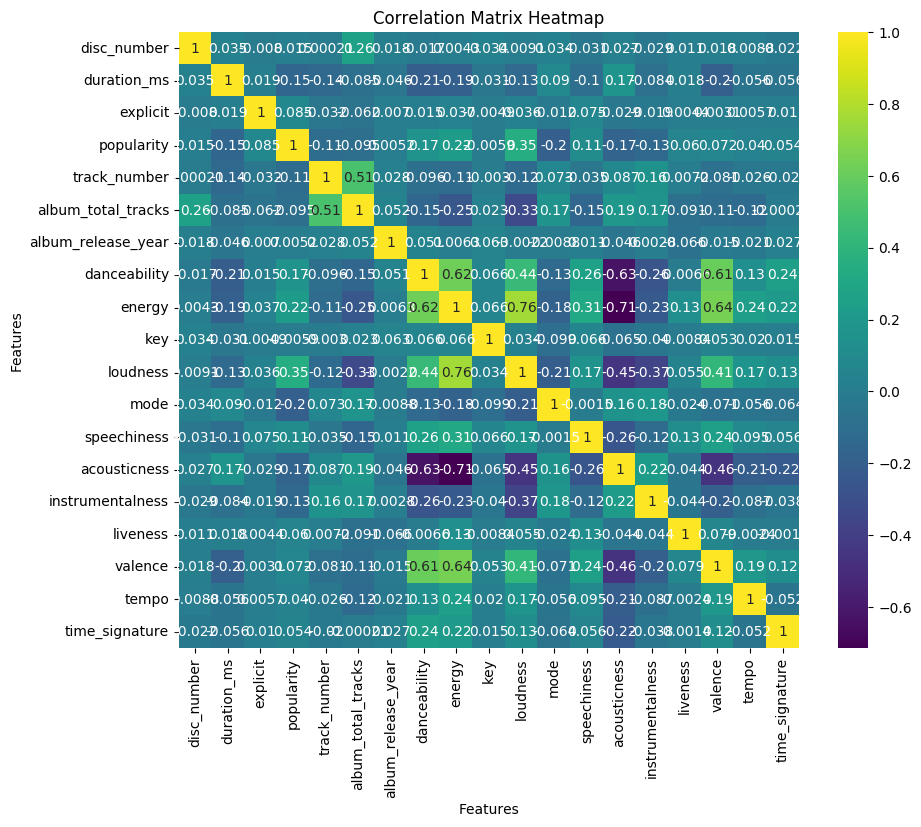

In [ ]:
# Calculate the correlation matrix
corr_matrix = spotify_df.corr(numeric_only=True)

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Calculate the correlation of 'popularity' with other features
popularity_corr = corr_matrix['popularity'].drop('popularity').sort_values(ascending=False)

# Remove the 'popularity' feature from the correlation results
popularity_corr = popularity_corr[popularity_corr.index != 'popularity']

# Print the features most positively correlated with 'popularity'
print("Features with the highest correlation to popularity:")
print(popularity_corr)


Features with the highest correlation to popularity:
loudness              0.345591
energy                0.223515
danceability          0.166421
speechiness           0.114274
explicit              0.085311
valence               0.072353
liveness              0.060086
time_signature        0.054152
tempo                 0.039718
disc_number           0.014592
album_release_year    0.005247
key                  -0.005923
album_total_tracks   -0.095055
track_number         -0.110817
instrumentalness     -0.133704
duration_ms          -0.150982
acousticness         -0.166836
mode                 -0.198692
Name: popularity, dtype: float64


In [ ]:
# Calculate the correlation of 'duration_ms' with other features
duration_corr = corr_matrix['duration_ms'].sort_values(ascending=False)

# Remove the 'duration_ms' feature from the correlation results
duration_corr = duration_corr[duration_corr.index != 'duration_ms']

# Print the features most positively correlated with 'duration_ms'
print("Features with the highest correlation to duration_ms:")
print(duration_corr)

Features with the highest correlation to duration_ms:
acousticness          0.170713
mode                  0.089504
disc_number           0.035092
explicit              0.018728
liveness              0.018118
key                  -0.031191
album_release_year   -0.046045
time_signature       -0.055702
tempo                -0.055874
instrumentalness     -0.084382
album_total_tracks   -0.084771
speechiness          -0.102299
loudness             -0.129694
track_number         -0.136570
popularity           -0.150982
energy               -0.193684
valence              -0.200632
danceability         -0.210401
Name: duration_ms, dtype: float64


## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


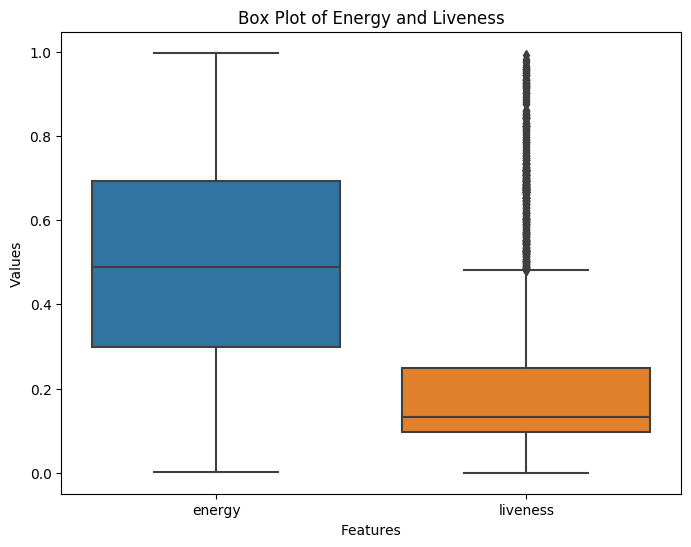

In [ ]:
# Select the columns of interest
features_of_interest = ['energy', 'liveness']

# Create a box plot for each feature
plt.figure(figsize=(8, 6))
sns.boxplot(data=spotify_df[features_of_interest])
plt.title('Box Plot of Energy and Liveness')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [ ]:
# Calculate the number of NaN values in each column
nan_counts = spotify_df.isna().sum()

# Print the number of NaN values in each column
print("Number of NaN values in each column:")
print(nan_counts.sort_values(ascending=False))

Number of NaN values in each column:
track_name_farsi      10020
album_total_tracks     9701
popularity             9701
album_href             9701
key_mode                144
mode_name               144
key_name                144
acousticness              0
loudness                  0
mode                      0
speechiness               0
liveness                  0
instrumentalness          0
energy                    0
valence                   0
tempo                     0
time_signature            0
key                       0
track_id                  0
danceability              0
disc_number               0
album_release_year        0
album_release_date        0
album_name                0
album_id                  0
track_number              0
artist_name_farsi         0
artist_name               0
track_name                0
explicit                  0
duration_ms               0
track_href                0
dtype: int64


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [ ]:
# Select only the numeric columns from the DataFrame
numeric_cols = spotify_df.select_dtypes(include='number')

# Check for NaN values in each numeric column
numeric_cols_with_nan = numeric_cols.columns[numeric_cols.isna().any()].tolist()

# Print the columns with NaN values
print("Numeric columns with NaN values:")
print(numeric_cols_with_nan)

print('-------')

# Select only the categorical columns from the DataFrame
categorical_cols = spotify_df.select_dtypes(include='object')

# Check for NaN values in each categorical column
categorical_cols_with_nan = categorical_cols.columns[categorical_cols.isna().any()].tolist()

# Print the columns with NaN values
print("Categorical columns with NaN values:")
print(categorical_cols_with_nan)

Numeric columns with NaN values:
['popularity', 'album_total_tracks']
-------
Categorical columns with NaN values:
['track_name_farsi', 'album_href', 'key_name', 'mode_name', 'key_mode']


In [ ]:
spotify_df[categorical_cols_with_nan] = spotify_df[categorical_cols_with_nan].fillna("None")

spotify_df[numeric_cols_with_nan] = spotify_df[numeric_cols_with_nan].fillna(spotify_df[numeric_cols_with_nan].mean())


# Check if any column has NaN
if spotify_df.isnull().values.any():
    print('THERE is NaN value')
else:
    print('No NaN value')

No NaN value


<div dir='rtl'>
<p>
استفاده از میانگین برای پر کردن مقادیر عددی در صورت وجود مقادیر ناپیدا (NaN)، یک روش معمول در پردازش داده‌ها است. دلیل استفاده از میانگین این است که این روش باعث حفظ تمامیت مرجعیت مقادیر میانی در داده‌ها می‌شود.

وقتی که مقداری از داده‌های عددی گم شده‌اند، استفاده از میانگین به عنوان مقدار پر کننده می‌تواند منطقی باشد. زیرا میانگین مقداری است که توسط داده‌های موجود محاسبه شده و نمایانگر مقدار متوسط است. با پر کردن مقادیر گم شده با میانگین، میانگین کلی داده‌ها حفظ می‌شود و در نتیجه تأثیر زیادی بر روی تحلیل‌های آتی نخواهد داشت.

استفاده از میانگین به عنوان مقدار پر کننده مناسب است زمانی که توزیع داده‌ها نسبتاً متقارن و بدون اوتلایرهای قوی باشد. با این روش، تلاش می‌شود تا ویژگی مرجعیت مقادیر متوسط داده‌ها حفظ شود.
</p>
</div>

# Determine your desired features here

In [ ]:
# print all cols
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [ ]:
music_feature_cols = [
    # To be completed
    'duration_ms',
    'explicit',
    'album_release_year',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'key_mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'artist_name',
]

In [ ]:
tracks_feature_df = spotify_df[music_feature_cols].dropna()
tracks_feature_df

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,key_mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,artist_name
0,446880,False,2020,0.437,0.390,0,-7.170,0,C minor,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,Salar Aghili
1,851920,False,2020,0.379,0.146,5,-10.008,1,F major,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,Salar Aghili
2,293160,False,2020,0.437,0.453,5,-5.392,0,F minor,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,Salar Aghili
3,648720,False,2020,0.488,0.138,2,-12.287,0,D minor,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,Salar Aghili
4,273480,False,2020,0.301,0.443,0,-5.702,0,C minor,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,False,1985,0.356,0.499,4,-10.805,0,E minor,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,Shahram Nazeri
10628,3522173,False,2008,0.318,0.163,5,-17.538,0,F minor,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,Shahram Nazeri
10629,3402706,False,2008,0.213,0.218,8,-15.865,1,G# major,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,Shahram Nazeri
10630,3342733,False,2008,0.242,0.304,8,-13.286,1,G# major,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,Shahram Nazeri


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [ ]:
numeric_cols = tracks_feature_df.select_dtypes(include='number').columns

categorical_cols = tracks_feature_df.select_dtypes(include='object').columns

print(numeric_cols)

print(categorical_cols)

Index(['duration_ms', 'album_release_year', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')
Index(['key_mode', 'artist_name'], dtype='object')


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Apply StandardScaler on numeric columns
scaler = StandardScaler()
tracks_feature_df[numeric_cols] = scaler.fit_transform(tracks_feature_df[numeric_cols])

# Apply LabelEncoder on categorical columns
encoder = LabelEncoder()
tracks_feature_df[categorical_cols] = tracks_feature_df[categorical_cols].apply(encoder.fit_transform)

# Transform boolean cols
tracks_feature_df['explicit'] = tracks_feature_df['explicit'].astype(int)

In [ ]:
tracks_feature_df['popularity'] = spotify_df['popularity']

## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


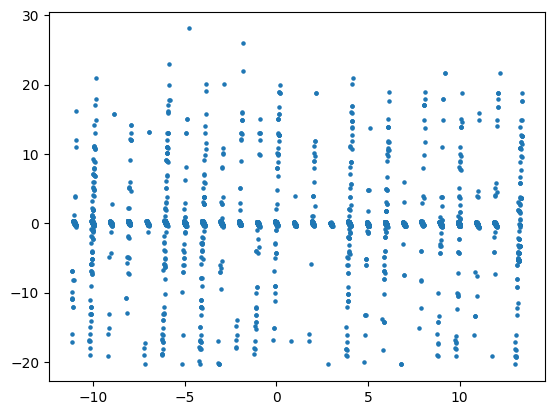

In [ ]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


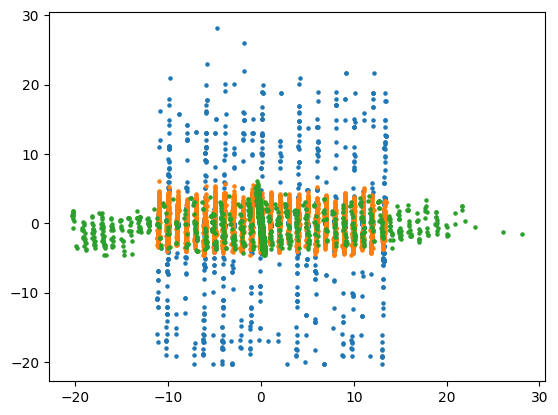

In [ ]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [ ]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [ ]:
df = tracks_feature_df
regression_features = [
    # Your desired features columns
    'duration_ms',
    'danceability',
    'energy',
    'loudness',
    'key_mode',
    'acousticness',
    'liveness',
    'valence',
    'tempo',
    'time_signature',
    'artist_name',
]

x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [ ]:
regressor = LinearRegression(
    # pass parameters here
    fit_intercept=True,  # Whether to calculate the intercept (bias) term
    copy_X=True  # Whether to copy the input features before fitting
 
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

19.77985158893246
[-0.08724185  0.10329514 -0.17602255  0.3981024   0.00839187 -0.08406248
  0.02906983 -0.12485788  0.00597342  0.01903029  0.00666589]


## Evaluate Regression Algorithm

In [ ]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.045815
1,20.113856,20.552176
2,20.113856,20.611648
3,20.113856,20.036837
4,20.113856,19.689511
...,...,...
3185,20.113856,20.516252
3186,12.000000,20.223750
3187,20.113856,19.446580
3188,20.113856,20.157419


In [ ]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9860411296881492
Mean Squared Error: 8.807517251921308
Root Mean Squared Error: 2.9677461569213275


# Classification

## Prepare Labels

In [ ]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

In [ ]:
tracks_feature_df['artist_name'] = spotify_df['artist_name']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [ ]:
tracks_feature_df['is_sonnati'] = np.where(tracks_feature_df['artist_name'].isin(sonnati_artists), 1, 0)

In [ ]:
tracks_feature_df.describe()

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,key_mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity,is_sonnati
count,1.063200e+04,10632.000000,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,10632.000000,10632.000000
mean,-1.336612e-17,0.001975,2.566294e-16,-2.994010e-16,-5.881091e-17,2.004917e-17,-2.486098e-16,-8.019670e-18,11.017588,-8.019670e-18,-3.983103e-16,7.485025e-17,-7.485025e-17,-1.924721e-16,3.421726e-16,-8.019670e-17,20.113856,0.358728
std,1.000047e+00,0.044401,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,6.977352,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,3.080703,0.479650
min,-1.680127e+00,0.000000,-8.528307e+00,-2.964434e+00,-2.049304e+00,-1.432162e+00,-5.934864e+00,-7.728879e-01,0.000000,-9.826719e-01,-1.918195e+00,-4.481700e-01,-1.248615e+00,-1.884641e+00,-4.002013e+00,-5.754685e+00,0.000000,0.000000
25%,-5.028027e-01,0.000000,1.003269e-01,-8.058199e-01,-8.206920e-01,-8.819636e-01,-5.634327e-01,-7.728879e-01,5.000000,-4.747521e-01,-8.735159e-01,-4.481700e-01,-6.295786e-01,-8.106294e-01,-8.134842e-01,-1.045944e+00,20.113856,0.000000
50%,-2.075528e-01,0.000000,1.218447e-01,-8.047930e-02,-3.064107e-02,-5.666550e-02,2.179660e-01,-7.728879e-01,10.000000,-3.509379e-01,3.631892e-01,-4.478620e-01,-3.892012e-01,-1.235549e-01,2.329099e-02,5.236364e-01,20.113856,0.000000
75%,2.653078e-01,0.000000,1.476660e-01,8.189431e-01,8.131829e-01,1.043732e+00,7.497731e-01,1.293849e+00,17.000000,-3.682961e-02,8.572419e-01,-3.957539e-01,3.668246e-01,7.632628e-01,6.252294e-01,5.236364e-01,20.113856,1.000000
max,2.176604e+01,1.000000,1.648803e-01,2.629393e+00,2.074783e+00,1.593931e+00,2.050765e+00,1.293849e+00,24.000000,1.222887e+01,1.215981e+00,3.052098e+00,5.161450e+00,2.214799e+00,3.371699e+00,2.093217e+00,48.000000,1.000000


## Create Classification Dataset

In [ ]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'artist_name', 'popularity']).values
y = tracks_feature_df['is_sonnati'].values

In [ ]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 17)
y.shape=(10632,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [ ]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [ ]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=5), dataset))

{'acc': 0.8200626959247649,
 'confusion': array([[1786,  309],
       [ 265,  830]]),
 'f1': 0.7430617726051925,
 'precision': 0.7287093942054433,
 'recall': 0.7579908675799086}


### Neural Network

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(50, 20), activation='relu', solver='adam', random_state=RANDOM_SEED)

pprint(fit_and_eval(model, dataset))

{'acc': 0.84858934169279,
 'confusion': array([[1835,  260],
       [ 223,  872]]),
 'f1': 0.7831162999550965,
 'precision': 0.7703180212014135,
 'recall': 0.7963470319634703}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=RANDOM_SEED)

pprint(fit_and_eval(model, dataset))

{'acc': 0.8200626959247649,
 'confusion': array([[1806,  289],
       [ 285,  810]]),
 'f1': 0.7383773928896991,
 'precision': 0.7370336669699727,
 'recall': 0.7397260273972602}


### Gaussian Process Classifier

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

model = GaussianProcessClassifier(random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8435736677115987,
 'confusion': array([[1824,  271],
       [ 228,  867]]),
 'f1': 0.7765338110165696,
 'precision': 0.7618629173989455,
 'recall': 0.7917808219178082}


### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8244514106583072,
 'confusion': array([[1805,  290],
       [ 270,  825]]),
 'f1': 0.7466063348416289,
 'precision': 0.7399103139013453,
 'recall': 0.7534246575342466}


### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=20, random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8843260188087775,
 'confusion': array([[1904,  191],
       [ 178,  917]]),
 'f1': 0.8325011348161597,
 'precision': 0.8276173285198556,
 'recall': 0.8374429223744292}


### SVC

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8394984326018808,
 'confusion': array([[1809,  286],
       [ 226,  869]]),
 'f1': 0.7724444444444445,
 'precision': 0.7523809523809524,
 'recall': 0.7936073059360731}


### Naive Bayes (GaussianNB)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
pprint(fit_and_eval(model, dataset))

{'acc': 0.7990595611285266,
 'confusion': array([[1666,  429],
       [ 212,  883]]),
 'f1': 0.7336933942667222,
 'precision': 0.6730182926829268,
 'recall': 0.806392694063927}


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=150, random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8639498432601881,
 'confusion': array([[1870,  225],
       [ 209,  886]]),
 'f1': 0.8032638259292839,
 'precision': 0.7974797479747975,
 'recall': 0.8091324200913242}


<div dir="rtl">
<p>
رندوم فارست به دلایل زیر در بسیاری از وظایف یادگیری ماشین به خوبی عمل می‌کند:

1. **یادگیری انبوه**: رندوم فارست یک روش یادگیری انبوه است که تعدادی درخت تصمیم را برای پیش‌بینی ترکیب می‌کند. با جمع‌آوری پیش‌بینی‌های درخت‌های مختلف، خطر بیش‌برازش کاهش می‌یابد و قابلیت تعمیم مدل را بهبود می‌بخشد.

2. **انتخاب ویژگی ضمنی**: رندوم فارست به طور خودکار انتخاب ویژگی را انجام می‌دهد، با انتخاب تصادفی یک زیرمجموعه از ویژگی‌ها در هر بخش برای ساخت درخت. این انتخاب تصادفی از ویژگی‌ها به کاهش تأثیر ویژگی‌های بی‌ربط و بهبود قابلیت اطمینان مدل در برابر داده‌های نویزی کمک می‌کند.

3. **کنترل روابط غیرخطی**: رندوم فارست قادر است به روابط غیرخطی پیچیده بین ویژگی‌ها و متغیر هدف پی ببرد. هر درخت تصمیم در مجموعه نکات و نمونه‌های مختلف را یاد می‌گیرد و ترکیب این درخت‌ها به مدل کمک می‌کند تا الگوها و تعاملات گسترده‌ای را در داده‌ها کشف کند.

4. **مقاومت در برابر نقاط پرت و مقادیر گمشده**: رندوم فارست مقاوم در برابر نقاط پرت و مقادیر گمشده در داده‌ها است. تأثیر متوسط چند درخت بر روی نقاط داده‌ها یا مقادیر گمشده، تأثیر افراد یا مقادیر گمشده را بر پیش‌بینی‌های کلی کاهش می‌دهد.

5. **منظم‌سازی درونی**: رندوم فارست مکانیسم‌های منظم‌سازی داخلی مانند حداکثر عمق، حداقل نمونه برای تقسیم بندی و حداقل نمونه در هر برگ دارد. این پارامترهای منظم‌سازی بیش‌برازش را جلوگیری می‌کنند و قابلیت تعمیم مدل به داده‌های ناشناخته را بهبود می‌بخشند.

6. **کارآیی و قابلیت مقیاس‌پذیری**: رندوم فارست قادر است به طور کارآمد با مجموعه داده‌های بزرگ با ویژگی‌های بالادستی کار کند. موازی‌سازی ساخت و پیش‌بینی درخت‌ها، آن را قابلیت مقیاس‌پذیری و مناسب برای کاربردهای داده‌های بزرگ می‌کند.

7. **قابلیت تفسیرپذیری**: رندوم فارست اطلاعات اهمیت ویژگی را فراهم می‌کند که نشان می‌دهد چقدر هر ویژگی در پیش‌بینی‌ها مهم است. این اطلاعات می‌توانند برای درک روابط پنهان در داده‌ها و انتخاب ویژگی مفید باشند.
</p>
</div>

In [ ]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=20, random_state=RANDOM_SEED)
pprint(fit_and_eval(model, dataset))

{'acc': 0.8843260188087775,
 'confusion': array([[1904,  191],
       [ 178,  917]]),
 'f1': 0.8325011348161597,
 'precision': 0.8276173285198556,
 'recall': 0.8374429223744292}
